In [18]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
image=cv2.imread(r'C:/Users/arpit14276/Desktop/pyimagesearch/horseshoe_bend.png')
image.shape

(375, 500, 3)

In [20]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [21]:
hist=cv2.calcHist([image],[0,1,2,],None,[32,32,32],[0, 180, 0, 256, 0, 256])

In [22]:
hist.shape

(32, 32, 32)

In [ ]:
#note : output i.e hist will have 32 rows (each row represent one bin) and onve columne i.e count (count of number of pixel in each bin)

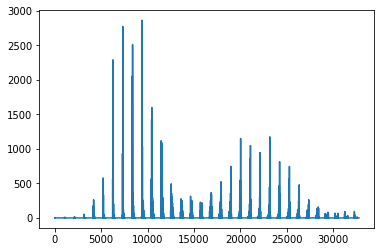

In [24]:
plt.plot(hist.ravel())

In [ ]:
hist/=hist.sum()

In [ ]:
plt.plot(hist)

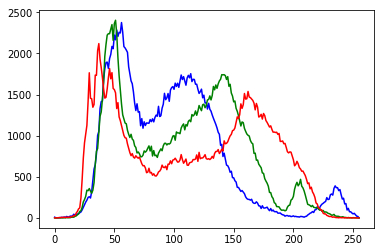

In [23]:
### histogram for all the colors 
chan=('b','g','r')
imgs=cv2.split(image)
cv2.imshow('image',image)
for c,i in zip(chan,imgs):
    plt.plot(cv2.calcHist([i],[0],None,[256],[0,255]),color=c)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
## 2D histogram (plot 2 color at a time)

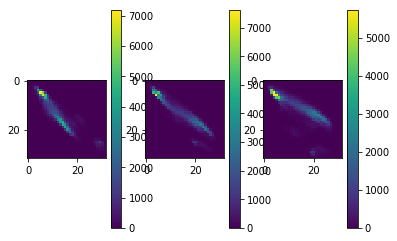

In [27]:
fig=plt.figure()
ax=fig.add_subplot(131)
hist=cv2.calcHist([imgs[1],imgs[0]],[0,1],None,[32,32],[0,256,0,256])
p=ax.imshow(hist)
plt.colorbar(p)

#fig=plt.figure()
ax=fig.add_subplot(132)
hist=cv2.calcHist([imgs[1],imgs[2]],[0,1],None,[32,32],[0,256,0,256])
p=ax.imshow(hist)
plt.colorbar(p)

ax=fig.add_subplot(133)
hist=cv2.calcHist([imgs[0],imgs[2]],[0,1],None,[32,32],[0,256,0,256])
p=ax.imshow(hist)
plt.colorbar(p)
    

In [ ]:
##### equlization ######

In [ ]:
'''
 Applying histogram equalization will stretch the peak out towards the corner of the image,
 thus improving the global contrast of the image. Histogram equalization is applied to grayscale images
 '''

In [ ]:
image=cv2.imread(r'C:\Users\arpit14276\Desktop\pyimagesearch\hist.png')

In [ ]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [28]:
cv2.imshow('gray',gray)
cv2.imshow('equi hist',cv2.equalizeHist(gray))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
cv2.equalizeHist(gray)[272,146]

210

In [ ]:
gray_hist=cv2.calcHist([gray],[0],None,[256],[0,255])
equi_hist=cv2.equalizeHist(gray)
equi_hist=cv2.calcHist([equi_hist],[0],None,[256],[0,255])
plt.plot(gray_hist)
plt.plot(equi_hist)
plt.show()

In [ ]:
#### histogram with mask  #######

In [3]:
def plot_hist(image,title,mask=None):
    chans=cv2.split(image)
    colors=('b','g','r')
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    for (chan,color) in zip(chans,colors):
        hist=cv2.calcHist([chan],[0],mask,[255],[0,256])
        plt.plot(hist,color=color)
        

In [6]:
#plot_hist(image,'Beach')

In [15]:
image=cv2.imread(r'C:\Users\arpit14276\Desktop\pyimagesearch\horseshoe_bend.png')
mask=np.zeros(image.shape[:2],dtype='uint8')

In [16]:
mask=cv2.rectangle(mask,(100,100),(50,390),255,-1)
masked=cv2.bitwise_and(image,image,mask=mask)

In [17]:
cv2.imshow('original',image)
cv2.imshow('mask',mask)
cv2.imshow('masked',masked)
cv2.waitKey(0)
cv2.destroyAllWindows()


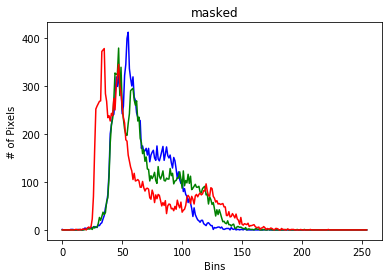

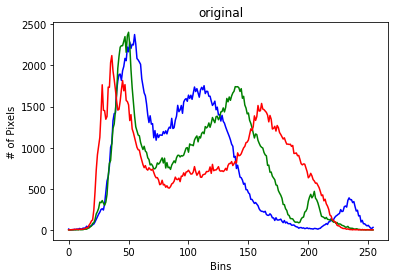

In [18]:
plot_hist(image,'masked',mask=mask)
plot_hist(image,'original')

In [19]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

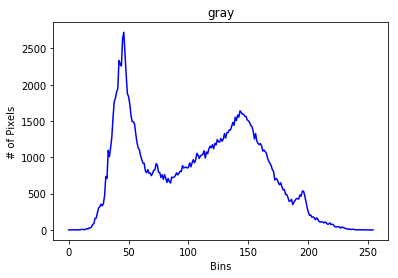

In [20]:
plot_hist(gray,'gray')

In [27]:
##### test related to CBIR 


In [32]:
(h, w) = image.shape[:2]
(cX, cY) = (int(w * 0.5), int(h * 0.5))
'''cornerMask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(cornerMask, (startX, startY), (endX, endY), 255, -1)'''


segments = [(0, cX, 0, cY), (cX, w, 0, cY), (cX, w, cY, h),
            (0, cX, cY, h)]
 
# construct an elliptical mask representing the center of the
# image
(axesX, axesY) = (int(w * 0.75) // 2, int(h * 0.75) // 2)
ellipMask = np.zeros(image.shape[:2], dtype="uint8")
cv2.ellipse(ellipMask, (cX, cY), (axesX, axesY), 0, 0, 360, 255, -1)
 
# loop over the segments
for (startX, endX, startY, endY) in segments:
    #construct a mask for each corner of the image, subtracting
    # the elliptical center from it
    cornerMask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.rectangle(cornerMask, (startX, startY), (endX, endY), 255, -1)
    cornerMask = cv2.subtract(cornerMask, ellipMask)
    hist = cv2.calcHist([image], [0, 1, 2], cornerMask, [32,32,32],[0, 180, 0, 256, 0, 256])
    